 
# <center> DHBSI 2017: Computational Text Analysis </center>

## <center> Laura Nelson <br/> <em>Postdoctoral Fellow | Digital Humanities @ Berkeley | Berkeley Institute for Data Science </em> </center>

## <center> Teddy Roland <br/> <em> PhD Student, UC Santa Barbara </em> </center>

# <center> Summary </center>
## <center> Text Analysis Demystified </center>
### <center> It's Just Counting! <br/> </center>
![Counting](Text_Counting.jpg)

## <center> The Dark Side of DH: An Invitation
![Dark Side](Dark_Side.jpg)

## <center> Text Analysis in Research </center>
![Interpretive Moments](Text_Analysis_In_Reearch.jpg)

# Lesson 1: Introduction to Natural Language Processing

In [1]:
# Prep
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
import string


# Read Novels from Hard-Drive
text1 = open('../01-Intro to NLP/text1.txt').read()
text2 = open('../01-Intro to NLP/text2.txt').read()


# Tokenize Novels
text1_tokens = word_tokenize(text1)
text2_tokens = word_tokenize(text2)


# Set Words to Lower Case
text1_tokens_lower = [word.lower() for word in text1_tokens]
text2_tokens_lower = [word.lower() for word in text2_tokens]


# Remove Stopwords
text1_tokens_nostops = [word for word in text1_tokens_lower if word not in stopwords.words('english')]
text2_tokens_nostops = [word for word in text2_tokens_lower if word not in stopwords.words('english')]


# Remove Punctuation Marks
text1_tokens_clean = [word for word in text1_tokens_nostops if word not in string.punctuation]
text2_tokens_clean = [word for word in text2_tokens_nostops if word not in string.punctuation]

# Tally the Term Frequencies
text1_word_frequency = nltk.FreqDist(text1_tokens_clean)
text2_word_frequency = nltk.FreqDist(text2_tokens_clean)

print("Frequent Words for Text 1",'\t', "Frequent Words for Text 2")
print("_________________________",'\t', "_________________________")

for i in range(20):
    word1, word2 = text1_word_frequency.most_common(20)[i][0], text2_word_frequency.most_common(20)[i][0]
    print('\t',word1, '\t'*(4 - len(word1)//6), word2)
    
    
## Can you guess the novel from most frequent words?

Frequent Words for Text 1 	 Frequent Words for Text 2
_________________________ 	 _________________________
	 's 				 ''
	 '' 				 ``
	 `` 				 's
	 whale 				 elinor
	 one 				 could
	 like 				 marianne
	 upon 				 mrs.
	 ahab 				 would
	 man 				 said
	 ship 				 every
	 old 				 one
	 would 				 much
	 ye 				 must
	 sea 				 sister
	 though 			 edward
	 yet 				 dashwood
	 time 				 mother
	 captain 			 time
	 long 				 jennings
	 still 				 know


# Lesson 2: Basics of Python

In [2]:
# Nothing to see here, folks

# Lesson 3: Operationalizing

Populating the interactive namespace from numpy and matplotlib


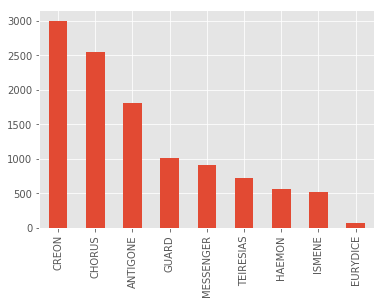

In [3]:
# Prep
import pandas

# Import Spreadsheet with Each Character's Lines
dialogue_df = pandas.read_csv('../03-Operationalizing/antigone_dialogue.csv', index_col=0)

# Tokenize
dialogue_tokens = [character.split() for character in dialogue_df['DIALOGUE']]

# Count the Number of Tokens per Character
dialogue_df['WORDS_SPOKEN'] = [len(tokens) for tokens in dialogue_tokens]

# List Characters by Number of Words Spoken
dialogue_df = dialogue_df.sort_values('WORDS_SPOKEN', ascending = False)

# Tell Jupyter to Produce Any Visualizations within Notebook
% pylab inline

# Makes images look good
style.use('ggplot')

# Let's visualize!
dialogue_df['WORDS_SPOKEN'].plot(kind='bar')


## Who is the protagonist of Antigone?

# Lesson 4: Discriminating Words

In [4]:
# Prep
from sklearn.feature_extraction.text import TfidfVectorizer

# Spreadsheet with Album Reviews
df = pandas.read_csv("../04-Discriminating-Words/BDHSI2016_music_reviews.csv", sep = '\t')

# Create a Document-Term Matrix (DTM), weight cells by Tf-Idf
tfidfvec = TfidfVectorizer()
dtm_tfidf_df = pandas.DataFrame(tfidfvec.fit_transform(df.body).toarray(), columns=tfidfvec.get_feature_names(), index = df.index)

# Add a Column for Album Genre
df_genre = df['genre'].to_frame()
merged_df = df_genre.join(dtm_tfidf_df, how = 'right', lsuffix='_x')

# Get Reviews for 3 Genres: Rap, Alternative/Indie Rock, and Jazz
dtm_rap = merged_df[merged_df['genre_x']=="Rap"]
dtm_indie = merged_df[merged_df['genre_x']=="Alternative/Indie Rock"]
dtm_jazz = merged_df[merged_df['genre_x']=="Jazz"]

# Print Words with Highest Tf-Idf Scores per Genre
print("Rap Words")
print(dtm_rap.max(numeric_only=True).sort_values(ascending=False)[0:20])
print()
print("Indie Words")
print(dtm_indie.max(numeric_only=True).sort_values(ascending=False)[0:20])
print()
print("Jazz Words")
print(dtm_jazz.max(numeric_only=True).sort_values(ascending=False)[0:20])


## What words are distinct to reviews of Rap albums, Indie albums, and Jazz albums?

Rap Words
blank             0.854475
039               0.797595
waste             0.755918
amiable           0.730963
awesomely         0.717079
same              0.672391
sucker            0.663760
tight             0.653993
beastie           0.650603
lamest            0.639377
derivativeness    0.636271
authentic         0.627192
diverse           0.623373
sermon            0.621175
mastermind        0.609213
neat              0.608922
we                0.600755
lift              0.591821
supreme           0.590431
overwhelms        0.586293
dtype: float64

Indie Words
underplayed    0.516717
prisoner       0.512087
jezabels       0.512087
careworn       0.509386
folk           0.476719
victory        0.449289
exhausted      0.445969
bigger         0.441849
heyday         0.438114
babelfished    0.431543
bet            0.426091
worn           0.416482
93             0.416137
try            0.415525
triumph        0.413976
silhouette     0.413374
icelandic      0.411715
fourth        

# Lesson 5: Sentiment Analysis using the Dictionary Method

In [5]:
# Read Files with Positive & Negative Words
positive_file = open("../05-Dictionary-Method/positive_words.txt").read()
negative_file = open("../05-Dictionary-Method/negative_words.txt").read()

# Tokenize Lists of Words
positive_words = set(positive_file.split('\n'))
negative_words = set(negative_file.split('\n'))

# Get Positive Words from the Novels in Lesson 1
text1_pos = [word for word in text1_tokens_clean if word in positive_words]
text2_pos = [word for word in text2_tokens_clean if word in positive_words]

# Get their Negative Words
text1_neg = [word for word in text1_tokens if word in negative_words]
text2_neg = [word for word in text2_tokens if word in negative_words]


print("Melville")
print("% Positive Words:", np.round(len(text1_pos)/len(text1_tokens),4)*100)
print("% Negative Words:", np.round(len(text1_neg)/len(text1_tokens),4)*100)
print()
print("Austen")
print("% Positive Words:", np.round(len(text2_pos)/len(text2_tokens),4)*100)
print("% Negative Words:", np.round(len(text2_neg)/len(text2_tokens),4)*100)


## Who is more postive, Melville or Austen?

Melville
% Positive Words: 2.92
% Negative Words: 2.67

Austen
% Positive Words: 4.6
% Negative Words: 2.57


# Lesson 6: Literary Distinction

In [6]:
# Prep
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import os

# Folders with Each Half of the Corpus
review_path = '../06-Literary Distinction (Probably)/poems/reviewed/'
random_path = '../06-Literary Distinction (Probably)/poems/random/'

# Get List of Files in Each Folder
review_files = os.listdir(review_path)
random_files = os.listdir(random_path)

# Read All Volumes of Poetry
review_texts = [open(review_path+file_name).read() for file_name in review_files]
random_texts = [open(random_path+file_name).read() for file_name in random_files]

# Compile into Single List of Texts, Make Labels
all_texts = review_texts + random_texts
all_file_names = review_files + random_files
all_labels = ['reviewed'] * len(review_texts) + ['random'] * len(random_texts)

# Create DTM
cv = CountVectorizer(stop_words = 'english', min_df=180, binary = True, max_features = None)
dtm = cv.fit_transform(all_texts)

# Learn to Predict whether Poetry Volume was "Reviewed" in a Prestigious Magazine or Not
nb = MultinomialNB()
nb.fit(dtm, all_labels)

# Now Let's Throw Two New Poems into the Mix
dickinson_canonic = """Because I could not stop for Death – 
He kindly stopped for me –  
The Carriage held but just Ourselves –  
And Immortality.

We slowly drove – He knew no haste
And I had put away
My labor and my leisure too,
For His Civility – 

We passed the School, where Children strove
At Recess – in the Ring –  
We passed the Fields of Gazing Grain –  
We passed the Setting Sun – 

Or rather – He passed us – 
The Dews drew quivering and chill – 
For only Gossamer, my Gown – 
My Tippet – only Tulle – 

We paused before a House that seemed
A Swelling of the Ground – 
The Roof was scarcely visible – 
The Cornice – in the Ground – 

Since then – ‘tis Centuries – and yet
Feels shorter than the Day
I first surmised the Horses’ Heads 
Were toward Eternity – """

anthem_patriotic = """O! say can you see, by the dawn's early light,
What so proudly we hailed at the twilight's last gleaming,
Whose broad stripes and bright stars through the perilous fight,
O'er the ramparts we watched, were so gallantly streaming?
And the rockets' red glare, the bombs bursting in air,
Gave proof through the night that our flag was still there;
O! say does that star-spangled banner yet wave
O'er the land of the free and the home of the brave?"""

# Make a DTM with the Two New Poems
unknown_dtm = cv.transform([dickinson_canonic,anthem_patriotic])

# Predict whether they would have been Reviewed
nb.predict(unknown_dtm)


## Can a computer predict whether a poem would be considered 'presitgious'?

array(['reviewed', 'random'], 
      dtype='<U8')

# Lesson 7: Word Embedding

In [7]:
import gensim
from nltk.tokenize import sent_tokenize

# Custom Tokenizer for Classroom Use
def fast_tokenize(text):  
    return "".join([char for char in text.lower() if char not in string.punctuation]).split()

# Set Location of Corpus Folder
fiction_folder = '../07-Word2Vec/txtlab_Novel450_English/'

# Collect Text of Each Novel in 'fiction_folder'
novel_list = [open(fiction_folder + filename, 'r').read() for filename in os.listdir(fiction_folder)]

# Split Each Novel into Sentences
sentences = [sentence for novel in novel_list for sentence in sent_tokenize(novel)]

# Split Each Sentence into Tokens
words_by_sentence = [fast_tokenize(sentence) for sentence in sentences]

# Remove Any Sentences that Contain Zero Tokens
words_by_sentence = [sentence for sentence in words_by_sentence if sentence != []]

# Train word2vec model from txtLab corpus
model = gensim.models.Word2Vec(words_by_sentence, size=100, window=5, \
                               min_count=25, sg=1, alpha=0.025, iter=5, batch_words=10000)

# King - Man + Woman -> Queen
model.most_similar(positive=['woman', 'king'], negative=['man'])

## Man is to King as Woman is to ??
## What has our model learned about gender?

[('queen', 0.7193931341171265),
 ('princess', 0.701875627040863),
 ('duke', 0.6478198766708374),
 ('duchess', 0.6437320709228516),
 ('priestess', 0.6279948949813843),
 ('flavia', 0.6270546913146973),
 ('emperor', 0.619001030921936),
 ('defender', 0.6177453994750977),
 ('ruritania', 0.6155887842178345),
 ('catharine', 0.6145066022872925)]